In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/laurakim/Downloads/sentiment labelled sentences/yelp_labelled.txt', delimiter='\t')
df.columns=['comment','score']
df

,comment,score
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0
6,The potatoes were like rubber and you could te...,0
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1


In [3]:
#True- negative feedback
#False- positive feedback
df['score']=(df['score']==0)

In [4]:
keywords=['awful','disappointed','disgusted','bad','terrible','not good','don\'t','do not','stop','avoid','never','did not','didn\'t','worst','wasn\'t','was not','isn\'t','is not','not','no','angry','mad', 'suck','wait','dry','expensive','money','rude','refuse','speak','slow','told','paid','poor','incompetent','problem','overpriced','stale','tasteless','bland','sour','inedible','rancid','dirty','rubber','nasty','flop','disgusting','cold','else','lost','horrible','waste','wasted','undercooked','bad service']

In [5]:
for key in keywords:
    df[str(key)]=df.comment.str.contains(' ' + str(key) + ' ', case=False)

In [6]:
df['upper case']=df.comment.str.isupper()

In [7]:
df

,comment,score,awful,disappointed,disgusted,bad,terrible,not good,don't,do not,...,disgusting,cold,else,lost,horrible,waste,wasted,undercooked,bad service,upper case
0,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Now I am getting angry and I want my damn pho.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Honeslty it didn't taste THAT fresh.),True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,The potatoes were like rubber and you could te...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,The fries were great too.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,A great touch.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Service was very prompt.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


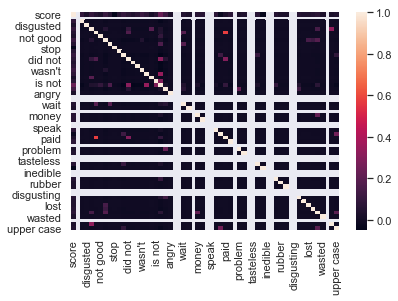

In [8]:
sns.set()
sns.heatmap(df.corr())

In [9]:
data=df[keywords + ['upper case']]
target=df['score']

In [10]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

bnb.fit(data, target)

y_pred=bnb.predict(data)


print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 306


In [11]:
df.shape

(999, 59)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(target, y_pred)

array([[468,  31],
       [275, 225]])

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(bnb, data, target, cv=5)

array([0.685     , 0.68      , 0.665     , 0.675     , 0.68341709])

In [16]:
#classifier 2:

words=['never','bad','worst','improve','money','long','do not','don\t','cold','dry', 'avoid','overpriced','unfortunately','disappointed']

In [17]:
for word in words:
    df[str(word)]=df.comment.str.contains(' ' + str(word) + ' ', case=False)

In [18]:
x=df[words]
y=df['score']

In [19]:
bnb.fit(x,y)

y_predict=bnb.predict(x)


print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y != y_predict).sum()
))

Number of mislabeled points out of a total 999 points : 441


In [20]:
confusion_matrix(y, y_predict)

array([[495,   4],
       [437,  63]])

In [21]:
cross_val_score(bnb, x, y, cv=5)

array([0.56      , 0.58      , 0.555     , 0.55      , 0.53768844])

In [22]:
#classifier 3:

In [23]:
lists=['never','bad','worst','improve', 'money','long','do not','don\t','cold','dry', 'avoid','disappointed']

In [24]:
for list in lists:
    df[str(list)]=df.comment.str.contains(' ' + str(list) + ' ', case=False)

In [25]:
a=df[lists]

In [26]:
bnb.fit(a,y)

y_predict_3=bnb.predict(a)


print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y != y_predict_3).sum()
))

Number of mislabeled points out of a total 999 points : 444


In [27]:
confusion_matrix(y, y_predict_3)

array([[495,   4],
       [440,  60]])

In [28]:
cross_val_score(bnb, a, y, cv=5)

array([0.555     , 0.58      , 0.555     , 0.545     , 0.53768844])

In [29]:
#classifier 4:

In [30]:
variables=['never','bad','worst','improve', 'money','long','do not', 'don\'t','slow', 'but', 'worse', 'angry', 'no','disgusted', 'rather','unhealthy','expensive','refried', 'lacked', 'below', 'vomited','wasn\'t', 'cold','dry', 'tragedy','suck.', 'talk', 'waste', 'wasted', 'avoid','disappointed','terrible', 'not impressed', 'didn\'t','won\'t', 'shocked', 'rubber', 'did not', 'underwhelming']

In [31]:
for variable in variables:
    df[str(variable)]=df.comment.str.contains(' ' + str(variable) + ' ', case=False)

In [32]:
c=df[variables]

In [33]:
bnb.fit(c,y)
y_pred_4=bnb.predict(c)
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y != y_pred_4).sum()
))

Number of mislabeled points out of a total 999 points : 350


In [34]:
confusion_matrix(y, y_pred_4)

array([[465,  34],
       [316, 184]])

In [35]:
cross_val_score(bnb, c, y, cv=5)

array([0.635     , 0.625     , 0.59      , 0.635     , 0.66331658])

In [36]:
split=[]
split=df['comment'].str.split("\\s+")

In [37]:
print(split)

0                                [Crust, is, not, good.]
1      [Not, tasty, and, the, texture, was, just, nas...
2      [Stopped, by, during, the, late, May, bank, ho...
3      [The, selection, on, the, menu, was, great, an...
4      [Now, I, am, getting, angry, and, I, want, my,...
5           [Honeslty, it, didn't, taste, THAT, fresh.)]
6      [The, potatoes, were, like, rubber, and, you, ...
7                        [The, fries, were, great, too.]
8                                     [A, great, touch.]
9                          [Service, was, very, prompt.]
10                               [Would, not, go, back.]
11     [The, cashier, had, no, care, what, so, ever, ...
12     [I, tried, the, Cape, Cod, ravoli,, chicken,wi...
13     [I, was, disgusted, because, I, was, pretty, s...
14     [I, was, shocked, because, no, signs, indicate...
15                                [Highly, recommended.]
16        [Waitress, was, a, little, slow, in, service.]
17     [This, place, is, not, w

In [38]:
print(split[0])

['Crust', 'is', 'not', 'good.']


In [39]:
length = np.arange(0,998)

In [40]:
split_combined = []
for x in length:
    split_combined += split[x]

In [41]:
split_combined

['Crust',
 'is',
 'not',
 'good.',
 'Not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty.',
 'Stopped',
 'by',
 'during',
 'the',
 'late',
 'May',
 'bank',
 'holiday',
 'off',
 'Rick',
 'Steve',
 'recommendation',
 'and',
 'loved',
 'it.',
 'The',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices.',
 'Now',
 'I',
 'am',
 'getting',
 'angry',
 'and',
 'I',
 'want',
 'my',
 'damn',
 'pho.',
 'Honeslty',
 'it',
 "didn't",
 'taste',
 'THAT',
 'fresh.)',
 'The',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'a',
 'warmer.',
 'The',
 'fries',
 'were',
 'great',
 'too.',
 'A',
 'great',
 'touch.',
 'Service',
 'was',
 'very',
 'prompt.',
 'Would',
 'not',
 'go',
 'back.',
 'The',
 'cashier',
 'had',
 'no',
 'care',
 'what',
 'so',
 'ever',
 'on',
 'what',
 'I',
 'had',
 'to',
 'say',
 'it',
 'still',
 '

In [42]:
len(split_combined)

10862

In [43]:
unique_list=[]
for a in split_combined:
    if a not in unique_list:
        unique_list.append(a)

In [44]:
unique_list

['Crust',
 'is',
 'not',
 'good.',
 'Not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty.',
 'Stopped',
 'by',
 'during',
 'late',
 'May',
 'bank',
 'holiday',
 'off',
 'Rick',
 'Steve',
 'recommendation',
 'loved',
 'it.',
 'The',
 'selection',
 'on',
 'menu',
 'great',
 'so',
 'were',
 'prices.',
 'Now',
 'I',
 'am',
 'getting',
 'angry',
 'want',
 'my',
 'damn',
 'pho.',
 'Honeslty',
 'it',
 "didn't",
 'taste',
 'THAT',
 'fresh.)',
 'potatoes',
 'like',
 'rubber',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'a',
 'warmer.',
 'fries',
 'too.',
 'A',
 'touch.',
 'Service',
 'very',
 'prompt.',
 'Would',
 'go',
 'back.',
 'cashier',
 'no',
 'care',
 'what',
 'ever',
 'to',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced.',
 'tried',
 'Cape',
 'Cod',
 'ravoli,',
 'chicken,with',
 'cranberry...mmmm!',
 'disgusted',
 'because',
 'pretty',
 'sure',
 'that',
 'human',
 'hair.',
 'shocked',
 

In [45]:
len(unique_list)

2959

In [46]:
print(unique_list[0:200])

['Crust', 'is', 'not', 'good.', 'Not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty.', 'Stopped', 'by', 'during', 'late', 'May', 'bank', 'holiday', 'off', 'Rick', 'Steve', 'recommendation', 'loved', 'it.', 'The', 'selection', 'on', 'menu', 'great', 'so', 'were', 'prices.', 'Now', 'I', 'am', 'getting', 'angry', 'want', 'my', 'damn', 'pho.', 'Honeslty', 'it', "didn't", 'taste', 'THAT', 'fresh.)', 'potatoes', 'like', 'rubber', 'you', 'could', 'tell', 'they', 'had', 'been', 'made', 'up', 'ahead', 'of', 'time', 'being', 'kept', 'under', 'a', 'warmer.', 'fries', 'too.', 'A', 'touch.', 'Service', 'very', 'prompt.', 'Would', 'go', 'back.', 'cashier', 'no', 'care', 'what', 'ever', 'to', 'say', 'still', 'ended', 'wayyy', 'overpriced.', 'tried', 'Cape', 'Cod', 'ravoli,', 'chicken,with', 'cranberry...mmmm!', 'disgusted', 'because', 'pretty', 'sure', 'that', 'human', 'hair.', 'shocked', 'signs', 'indicate', 'cash', 'only.', 'Highly', 'recommended.', 'Waitress', 'little', 'slow', 'in', 's

In [47]:
['not', 'nasty.', 'angry', 'damn', 'didn\'t', 'rubber', 'warmer', 'no care', 'overpriced.', 'disgusted', 'human hair.', 'shocked', 'cash only.', 'slow', 'Blah!', 'never', 'only', 'running around', 'overwhelmed.', 'worst']

['not',
 'nasty.',
 'angry',
 'damn',
 "didn't",
 'rubber',
 'warmer',
 'no care',
 'overpriced.',
 'disgusted',
 'human hair.',
 'shocked',
 'cash only.',
 'slow',
 'Blah!',
 'never',
 'only',
 'running around',
 'overwhelmed.',
 'worst']

In [48]:
print(unique_list[200:500])

['quick', 'grab', 'bite', 'some', 'familiar', 'pub', 'but', 'do', 'yourself', 'favor', 'look', 'elsewhere.', 'Overall,', 'lot.', 'redeeming', 'quality', 'inexpensive.', 'Ample', 'portions', 'Poor', 'service,', 'waiter', 'me', 'feel', 'stupid', 'every', 'came', 'table.', 'My', 'first', 'visit', 'Hiro', 'delight!', 'sucks.', 'shrimp', 'tender', 'moist.', 'There', 'deal', 'enough', 'would', 'drag', 'into', 'establishment', 'again.', 'Hard', 'judge', 'whether', 'these', 'sides', 'grossed', 'out', 'melted', 'styrofoam', 'eat', 'fear', 'sick.', 'On', 'positive', 'note,', 'server', 'attentive', 'provided', 'Frozen', 'pucks', 'disgust,', 'with', 'people', 'behind', 'register.', 'thing', 'prime', 'rib', 'dessert', 'section.', "It's", 'too', 'bad', 'generic.', 'burger', 'beef,', 'cooked', 'right.', 'If', 'sandwich', 'any', 'Firehouse!!!!!', 'side', 'Greek', 'dressing', 'tasty,', 'pita', 'hummus', 'refreshing.', 'We', 'ordered', 'duck', 'rare', 'pink', 'inside', 'nice', 'char', 'outside.', 'He', 

In [49]:
['but','elsewhere.', 'elsewhere', 'Poor', 'stupid', 'sucks.', 'sucks','suck','sucked', 'suck.', 'grossed out', 'gross', 'melted', 'styrofoam', 'fear', 'sick.', 'sick', 'pucks', 'disgust,', 'disgust','disgusting','disgusted', 'bad', 'generic.', 'generic', 'horrible', "talk down", "don't", 'Heart Attack', 'flat-lined', 'excuse', 'ripped,', 'ripped', 'petrified', 'tasteless.', 'struggle', 'meh.', 'meh', 'suck,', 'appalling', 'Bad', 'cheated', 'wasting', 'underwhelming', 'can\'t', 'wait', 'smelled', 'old', 'grease', 'bland.', 'bland']

['but',
 'elsewhere.',
 'elsewhere',
 'Poor',
 'stupid',
 'sucks.',
 'sucks',
 'suck',
 'sucked',
 'suck.',
 'grossed out',
 'gross',
 'melted',
 'styrofoam',
 'fear',
 'sick.',
 'sick',
 'pucks',
 'disgust,',
 'disgust',
 'disgusting',
 'disgusted',
 'bad',
 'generic.',
 'generic',
 'horrible',
 'talk down',
 "don't",
 'Heart Attack',
 'flat-lined',
 'excuse',
 'ripped,',
 'ripped',
 'petrified',
 'tasteless.',
 'struggle',
 'meh.',
 'meh',
 'suck,',
 'appalling',
 'Bad',
 'cheated',
 'wasting',
 'underwhelming',
 "can't",
 'wait',
 'smelled',
 'old',
 'grease',
 'bland.',
 'bland']

In [50]:
print(unique_list[500:800])

['sugary', 'disaster', 'tailored', 'palate', 'six', 'year', 'old.', 'love', 'Pho', 'spring', 'rolls', 'oh', 'yummy', 'try.', 'poor', 'meat', 'ratio', 'chicken', 'tenders', 'unsatisfying.', 'All', 'amazing!!!', 'Omelets', 'die', 'for!', 'Everything', 'fresh', 'delicious!', 'In', 'summary,', 'largely', 'disappointing', 'dining', 'experience.', 'sexy', 'party', 'mouth,', "you're", 'outrageously', 'flirting', 'hottest', 'party.', 'Never', 'Rock', 'Casino', 'before,', 'WILL', 'NEVER', 'EVER', 'STEP', 'FORWARD', 'IN', 'IT', 'AGAIN!', 'Best', 'breakfast', 'buffet!!!', 'bye', 'tip', 'lady!', "We'll", 'Will', 'again!', 'Food', 'arrived', 'quickly!', 'side,', 'cafe', 'serves', 'fantastic', 'wife', 'loves', 'roasted', 'garlic', 'bone', 'marrow,', 'added', 'extra', 'meal', 'another', 'marrow', 'go!', 'waiter,', 'helpful', 'bloddy', "mary's", 'coming.', 'Buffet', 'town,', 'price', 'cannot', 'beat', 'LOVED', 'mussels', 'wine', 'reduction,', 'tender,', 'dishes', 'better', 'buffets', 'to.', 'Tigerlill

In [51]:
['sugary', 'disaster', 'poor', 'unsatisfying.', 'unsatisfying', 'disappointing', 'Never', 'EVER', 'bye', 'gross!', 'disappointing.', 'blandest', 'Worst', 'boot,', 'worries.', 'lack', 'BITCHES!', 'Bland...', 'waste', "wouldn't", 'overpriced', 'rude.', 'rude', 'empty', "Don\'t", 'rarely', 'disappointed', 'slow.', 'pay']

['sugary',
 'disaster',
 'poor',
 'unsatisfying.',
 'unsatisfying',
 'disappointing',
 'Never',
 'EVER',
 'bye',
 'gross!',
 'disappointing.',
 'blandest',
 'Worst',
 'boot,',
 'worries.',
 'lack',
 'BITCHES!',
 'Bland...',
 'waste',
 "wouldn't",
 'overpriced',
 'rude.',
 'rude',
 'empty',
 "Don't",
 'rarely',
 'disappointed',
 'slow.',
 'pay']

In [52]:
print(unique_list[800:1100])

['attention', 'ignore', 'fiancé', 'middle', 'day', 'greeted', 'seated', 'away.', 'Mandalay', 'Bay.', 'waited', 'forty', 'five', 'minutes', 'vain.', 'Crostini', 'stale.', 'Some', 'highlights', ':', 'nigiri', 'here!', 'joint', 'clean.', 'different', 'cut', 'piece', 's', 'flavored.', 'Voodoo', "I'd", 'excellent', 'since', 'gluten', 'free', 'several', 'years', 'ago.', 'Unfortunately,', 'must', 'bakery', 'leftover', 'everything', 'STALE.', 'today', 'relocated', 'impressed.', 'immediately.', 'diverse,', 'reasonably', 'priced.', 'Avoid', 'cost!', 'Restaurant', 'full', 'wait.', 'DELICIOUS!!', 'hands-down', 'Phoenix', 'metro', 'area.', 'if', 'looking', 'food...', 'treated', 'bad.', 'Bacon', 'hella', 'salty.', 'spinach', 'avocado', 'salad;', 'ingredients', 'sad', 'literally', 'zero', 'taste.', 'used', 'be,', 'menus', 'handed', 'ladies', 'prices', 'listed.', 'waitresses', 'Lordy,', 'Khao', 'Soi', 'missed', 'lovers!', 'terrific', 'thrilled', 'accommodations', 'vegetarian', 'daughter.', 'Perhaps', 

In [53]:
['ignore', 'waited', 'vain.', 'stale.', 'Unfortunately', 'leftover', 'STALE.', 'Avoid', 'bad.', 'salty.', 'sad', 'zero', 'bland,', 'overcooked', 'heart attack.','rudely!', 'dirt.', 'lacking', 'sucked,', 'sucked', 'missing.', 'insulted', 'disrespected.', 'WORST', 'bug', 'tartar.', "Won't", 'lacking.', 'none', 'bodes', 'cold,', 'uninspired.']

['ignore',
 'waited',
 'vain.',
 'stale.',
 'Unfortunately',
 'leftover',
 'STALE.',
 'Avoid',
 'bad.',
 'salty.',
 'sad',
 'zero',
 'bland,',
 'overcooked',
 'heart attack.',
 'rudely!',
 'dirt.',
 'lacking',
 'sucked,',
 'sucked',
 'missing.',
 'insulted',
 'disrespected.',
 'WORST',
 'bug',
 'tartar.',
 "Won't",
 'lacking.',
 'none',
 'bodes',
 'cold,',
 'uninspired.']

In [54]:
print(unique_list[1100:1400])

['then', 'dealing', "world's", 'worst/annoying', 'drunk', 'people.', 'fun', 'chef.', 'Ordered', 'double', 'cheeseburger', 'single', 'patty', 'falling', 'apart', '(picture', 'uploaded)', 'Yeah,', 'couple', 'drinks', 'sporting', 'events', 'walls', 'covered', "TV's.", 'possible', 'stars,', "they'd", 'descriptions', '"yum', 'yum', 'sauce"', '"eel', 'sauce",', 'yet', '"spicy', 'mayo"...well', 'NONE', 'sauces', 'them.', 'hardest', 'decision...', 'Honestly,', "M's", 'supposed', '(amazing).', 'rolled', 'eyes', 'may', 'stayed...', 'try', 'Everyone', 'attentive,', 'providing', 'customer', 'Horrible', 'money.', 'flavourful.', 'By', 'almost', 'excuse.', '(It', 'busy', 'either)', 'Also,', 'building', 'FREEZING', 'cold.', 'reviewer', '"you', "couldn't", 'again."', '-Drinks', 'close', 'point.', 'Seriously', 'flavorful', 'delights,', 'folks.', 'Much', 'AYCE', 'lighting', 'dark', 'set', 'mood.', 'Based', 'sub-par', 'received', 'effort', 'show', 'gratitude', "won't", "Owner's", 'people.!', 'privileged',

In [55]:
['worst/annoying', 'falling apart', 'rolled eyes', 'Horrible', 'excuse.', 'FREEZING', 'cold.', 'complaints', 'disappointed.', 'wrong', 'bland', 'stinks', 'waited.', 'wrong:', 'burned', 'hate', 'Waited', 'sad...', 'boring.', 'greedy', 'atrocious', 'untoasted.', 'loudly', 'wrong.']

['worst/annoying',
 'falling apart',
 'rolled eyes',
 'Horrible',
 'excuse.',
 'FREEZING',
 'cold.',
 'complaints',
 'disappointed.',
 'wrong',
 'bland',
 'stinks',
 'waited.',
 'wrong:',
 'burned',
 'hate',
 'Waited',
 'sad...',
 'boring.',
 'greedy',
 'atrocious',
 'untoasted.',
 'loudly',
 'wrong.']

In [56]:
print(unique_list[1400:1700])

['meal.', 'Favorite', 'shawarrrrrrma!!!!!!', 'black', 'eyed', 'peas', 'potatoes...', 'UNREAL!', 'serve', 'vinaigrette', 'overall', 'dish,', 'far', 'seen', 'breakfast,', 'especially', '$4.00.', 'mom', 'immediately', 'sick', 'bites', 'salad.', 'pleasant', 'honor', 'Hut', 'coupons.', 'truly', 'unbelievably', 'good,', 'pleased', 'gross.', 'First', 'location', 'dirty-', 'Seat', 'covers', 'replenished', 'plain', 'yucky!!!', 'burger...', '"Gold', 'Standard"', '$17', 'OMG,', 'delicioso!', 'authentic', 'spaghetti', 'special', 'whatsoever.', 'Of', 'dishes,', 'best,', 'vegetables', 'feels', 'Thai.', 'driving', 'Tucson!', 'Vegas.....there', 'none.', 'Pretty', 'Chipotle,', 'BETTER.', 'Classy/warm', 'atmosphere,', 'appetizers,', 'succulent', 'steaks', '(Baseball', 'steak!!!!!', 'brick', 'oven', 'app!', 'multiple', 'times,', 'ten', 'finally', 'left.', 'terrible!', 'equally', "shouldn't", 'pancakes', 'eggs.', 'delicious!!!', 'genuinely', 'enthusiastic', 'treat.', 'Sadly,', 'Gordon', "Ramsey's", 'Steak

In [57]:
['sick', 'gross.', 'dirty-', 'plain', 'yucky!!!', 'left.', 'terrible!', 'avoid', 'BLAND.', 'lukewarm.', 'stomach ache', 'RUDE', 'INCONSIDERATE','horrible,', 'terrible.', 'starving.', 'disgrace.', 'nay,','disappointment.', 'screwed!', 'frustrated.', 'WASTE', 'overwhelmed', 'poop.', 'mistake', 'jerk.', 'rushed.']

['sick',
 'gross.',
 'dirty-',
 'plain',
 'yucky!!!',
 'left.',
 'terrible!',
 'avoid',
 'BLAND.',
 'lukewarm.',
 'stomach ache',
 'RUDE',
 'INCONSIDERATE',
 'horrible,',
 'terrible.',
 'starving.',
 'disgrace.',
 'nay,',
 'disappointment.',
 'screwed!',
 'frustrated.',
 'WASTE',
 'overwhelmed',
 'poop.',
 'mistake',
 'jerk.',
 'rushed.']

In [58]:
print(unique_list[1700:2000])

['absolutley', 'awkward', '1.5lb', 'cow', '3/4ths', 'gristle', 'fat.', 'Steiners', 'bar.', 'Wow', 'familiar,', 'check', 'dollars', 'Anyway,', 'FS', 'breakfast/lunch.', 'Nothing', 'Each', 'week', 'mention', 'combination', 'pears,', 'almonds', 'big', 'winner!', 'Sauce', 'enough,', 'spicier', 'prefer', 'way.', 'ribeye', 'mesquite', "we'll", 'anytime', 'gooodd.', 'connoisseur', 'difference', 'certainly', 'insulted.', 'last', 'contained', 'driest', 'mouthful,', 'enjoyable', 'relaxed', 'venue', 'couples', 'groups', 'etc.', 'Nargile', 'tater', 'tots', 'southwest.', '$3', 'paid.', 'vanilla', 'smooth', 'profiterole', '(choux)', 'pastry', 'enough.', 'Im', 'AZ', 'new', 'manager', 'worst.', 'outstanding', 'reasonable.', "Carly's", 'due', 'acknowledged,', '35', 'food...and', 'forgetting', 'things.', 'margaritas,', 'too!', 'disappoint.', 'note', 'ventilation', 'upgrading.', 'sandwich.', 'Total', 'letdown,', 'rather', 'Camelback', 'Flower', 'Shop', 'Cartel', 'Coffee.', 'Third,', 'cheese', 'brunch.', 

In [59]:
['awkward', 'insulted.', 'driest', 'worst.', 'forgetting', 'disappoint.', 'letdown,', 'dont', 'Worse', 'humiliated', 'tragedy', 'Terrible', 'greasy,', 'unhealthy', 'apology', 'late.', 'expensive.', 'hair', 'disgraceful.', 'AVOID', 'suffers', 'disgusting.']

['awkward',
 'insulted.',
 'driest',
 'worst.',
 'forgetting',
 'disappoint.',
 'letdown,',
 'dont',
 'Worse',
 'humiliated',
 'tragedy',
 'Terrible',
 'greasy,',
 'unhealthy',
 'apology',
 'late.',
 'expensive.',
 'hair',
 'disgraceful.',
 'AVOID',
 'suffers',
 'disgusting.']

In [60]:
print(unique_list[2000:2300])

['sushi.', 'Generous', 'recommended', 'anyone!', 'forth', '"Are', 'helped?"', 'AN', 'HOUR...', 'seriously?', 'consider', 'theft.', 'Eew...', 'needs', 'complete', 'overhaul.', 'recently', 'witnessed', 'guests', 'regularly,', 'super', 'times.', 'tasted', 'old,', 'chewy', 'swung', 'deeply', 'company', 'better!', 'efficient.', 'service:', 'fan,', 'Boy', 'sucker', 'dry!!.', 'Over', 'rated.', 'where.', '100%', 'recommended!', '15', 'acknowledged.', 'setting.', 'cheap', 'olives.', 'perpared', 'beautiful', 'presentation', 'giant', 'slices', 'Toast,', 'lightly', 'dusted', 'powdered', 'sugar.', 'kids', 'play', 'NASTY!', 'fo', 'accomodate', 'vegan/veggie', 'options.', 'OMG', 'dish.', '"crumby"', 'pale', 'color', 'instead', 'NO', 'croutons', 'plus.', "It'll", 'regular', 'trips', 'Phoenix!', 'Crema', 'Café', 'expanded;', 'breakfast.', 'miss', 'wish', 'Philadelphia!', 'sitting', 'fairly', 'fast,', 'but,', 'order,', 'arrived.', 'crisp', 'town.', 'value,', "Couldn't", 'satisfying', 'awesome.', 'wanted

In [61]:
['theft.', 'Eew...', 'old,', 'sucker', 'dry!!.', 'Over rated.', 'NASTY!', 'reheated', 'cold', 'soggy.', 'disappointing!!!', 'ignored', 'dead', 'fails', 'mistake.', 'Disappointed', 'poorly', 'dry', 'Damn', 'fail.', 'mortified.']

['theft.',
 'Eew...',
 'old,',
 'sucker',
 'dry!!.',
 'Over rated.',
 'NASTY!',
 'reheated',
 'cold',
 'soggy.',
 'disappointing!!!',
 'ignored',
 'dead',
 'fails',
 'mistake.',
 'Disappointed',
 'poorly',
 'dry',
 'Damn',
 'fail.',
 'mortified.']

In [62]:
print(unique_list[2300:2600])

['say,', 'Anyways,', 'more.', 'dripping', 'grease,', 'mostly', 'Strip', 'Steak.', 'Have', '2007', 'awesome!!', 'serving', 'hospitality', 'industry', 'Paradise', 'refrained', 'recommending', 'Cibo', 'longer.', 'fun.', 'others.', '"to', 'go"', 'orders', 'mean', 'famous', 'terrible!?!', 'said,', 'mouths', 'bellies', 'pleased.', 'thing.', 'Thumbs', 'Up!!', 'reading', 'pizza,', 'reminded', 'legit', 'Only', 'Pros', 'Large', 'area/', 'simple', 'menu/', 'dough!', 'Tonight', 'Elk', 'special...and', 'sucked.', 'bite,', 'hooked.', 'classics', 'sorely', 'everything.', 'Cute,', 'quaint,', 'simple,', 'deliciously', 'fry', 'moist', 'inside.', 'always,', 'compliments', 'Special', 'thanks', 'Dylan', 'T.', ':)', 'tummy.', 'One', 'gratuity', 'larger', '6', '8,', 'FLY', 'apple', 'juice..', 'FLY!!!!!!!!', 'Han', 'Nan', 'Chicken', 'barely', 'lukewarm,', "Ryan's", 'Bar', 'Edinburgh', 'revisiting.', 'Nicest', 'Chinese', 'naan', 'pine', 'nut', 'world.', 'Probably', "Friend's", '--', 'bad,', 'touched', 'Try', '

In [63]:
['grease,', 'terrible!?!', 'sucked.', 'bad,', 'awkwardly', 'chewy', 'stale!', 'soggy', 'bother', 'smells', 'dirty', 'sewer.', 'colder.', 'Bland', 'flavorless', 'tepid', 'Mediocre', 'pissd.', 'overcooked?', 'unfortunately', 'negligent', 'unwelcome...', 'terrible', 'overpriced,', 'OVERPRICED!', 'puree.', 'worse', 'cramming', 'Awful', 'horrible.']

['grease,',
 'terrible!?!',
 'sucked.',
 'bad,',
 'awkwardly',
 'chewy',
 'stale!',
 'soggy',
 'bother',
 'smells',
 'dirty',
 'sewer.',
 'colder.',
 'Bland',
 'flavorless',
 'tepid',
 'Mediocre',
 'pissd.',
 'overcooked?',
 'unfortunately',
 'negligent',
 'unwelcome...',
 'terrible',
 'overpriced,',
 'OVERPRICED!',
 'puree.',
 'worse',
 'cramming',
 'Awful',
 'horrible.']

In [64]:
print(unique_list[2600:2960])

['gone.', 'fair', 'Kabuki', 'over-priced,', 'over-hip', 'under-services.', 'ever,', 'Maria', 'excellent.', 'paid', 'surprised', 'article', 'read', 'spices', 'fucking', 'small.', "Caballero's", 'since!', 'bucks', 'head,', 'visit,', 'oysters', 'were!', 'round', 'disbelief,', 'qualified', 'version', 'foods', 'not,', 'low', 'tolerance', 'people,', 'polite,', 'wash', 'otherwise!!', 'biscuit.', 'heat.', 'Wife', 'hated', '(coconut', 'shrimp),', 'meals,', 'fella', 'huevos', 'rancheros', 'appealing.', 'hour,', 'wines.', 'pricey', 'lot!', 'food/service', 'Talk', 'hot,', 'temp.I', 'prepare', 'BARE', 'HANDS,', 'gloves.Everything', 'deep', 'oil.', 'beans.', 'pleasure', 'him.', 'plethora', 'salads', 'sandwiches,', 'gets', 'seal', 'approval.', 'light', 'summer.', 'Strip,', 'go.', 'helped', 'college', 'cooking', 'class', 'started', 'editing', 'besides', "Costco's.", 'highlighted', 'unique', 'delightful', 'Weird', 'owners.', 'hardly', 'bagels', 'grocery', 'store.', 'Go', 'Place', 'Gyros.', 'owner/chef,

In [65]:
['over-priced,', 'over-hip', 'under-services.', 'disbelief,', 'hated', 'pricey', 'BARE', 'Weird', 'flavorless.', 'terrible,', 'mediocre.', 'ourselves.', 'refused', 'unprofessional', 'WEAK,', 'unexperienced', 'sad.', 'disrespected,', 'puréed.', 'poisoning', 'fail', 'disgusting!', 'lost', 'Disappointing', 'lacked', 'ridiculous.', 'dry,', 'trippy,', 'awful.', 'undercooked.', 'tasteless,', 'disappointed!!', 'douchey', 'Con:', 'disappointment', 'rude...', 'apologize', 'Insults,', 'deuchebaggery', 'disappointment!', 'nasty', 'avoided', 'disapppointment', 'pretty....off putting.', 'Overpriced', 'vomited', 'below average.', 'flop.', 'problem', 'undercooked,', 'dry.', 'closed down', 'refried', 'dried', 'underwhelming,']

['over-priced,',
 'over-hip',
 'under-services.',
 'disbelief,',
 'hated',
 'pricey',
 'BARE',
 'Weird',
 'flavorless.',
 'terrible,',
 'mediocre.',
 'ourselves.',
 'refused',
 'unprofessional',
 'WEAK,',
 'unexperienced',
 'sad.',
 'disrespected,',
 'puréed.',
 'poisoning',
 'fail',
 'disgusting!',
 'lost',
 'Disappointing',
 'lacked',
 'ridiculous.',
 'dry,',
 'trippy,',
 'awful.',
 'undercooked.',
 'tasteless,',
 'disappointed!!',
 'douchey',
 'Con:',
 'disappointment',
 'rude...',
 'apologize',
 'Insults,',
 'deuchebaggery',
 'disappointment!',
 'nasty',
 'avoided',
 'disapppointment',
 'pretty....off putting.',
 'Overpriced',
 'vomited',
 'below average.',
 'flop.',
 'problem',
 'undercooked,',
 'dry.',
 'closed down',
 'refried',
 'dried',
 'underwhelming,']

In [83]:
columns=['over-priced,', 'over-hip', 'under-services.', 'disbelief,', 'hated', 'pricey', 'BARE', 'Weird', 'flavorless.', 'terrible,', 'mediocre.', 'ourselves.', 'refused', 'unprofessional', 'WEAK,', 'unexperienced', 'sad.', 'disrespected,', 'puréed.', 'poisoning', 'fail', 'disgusting!', 'lost', 'Disappointing', 'lacked', 'ridiculous.', 'dry,', 'trippy,', 'awful.', 'undercooked.', 'tasteless,', 'disappointed!!', 'douchey', 'Con:', 'disappointment', 'rude...', 'apologize', 'Insults,', 'deuchebaggery', 'disappointment!', 'nasty', 'avoided', 'disapppointment', 'pretty....off putting.', 'Overpriced', 'vomited', 'below average.', 'flop.', 'problem', 'undercooked,', 'dry.', 'closed down', 'refried', 'dried', 'underwhelming,','grease,', 'terrible!?!', 'sucked.', 'bad,', 'awkwardly', 'chewy', 'stale!', 'soggy', 'bother', 'smells', 'dirty', 'sewer.', 'colder.', 'Bland', 'flavorless', 'tepid', 'Mediocre', 'pissd.', 'overcooked?', 'unfortunately', 'negligent', 'unwelcome...', 'terrible', 'overpriced,', 'OVERPRICED!', 'puree.', 'worse', 'cramming', 'Awful', 'horrible.','theft.', 'Eew...', 'old,', 'sucker', 'dry!!.', 'Over rated.', 'NASTY!', 'reheated', 'cold', 'soggy.', 'disappointing!!!', 'ignored', 'dead', 'fails', 'mistake.', 'Disappointed', 'poorly', 'dry', 'Damn', 'fail.', 'mortified.','awkward', 'insulted.', 'driest', 'worst.', 'forgetting', 'disappoint.', 'letdown,', 'dont', 'Worse', 'humiliated', 'tragedy', 'Terrible', 'greasy,', 'unhealthy', 'apology', 'late.', 'expensive.', 'hair', 'disgraceful.', 'AVOID', 'suffers', 'disgusting.','sick', 'gross.', 'dirty-', 'plain', 'yucky!!!', 'left.', 'terrible!', 'avoid', 'BLAND.', 'lukewarm.', 'stomach ache', 'RUDE', 'INCONSIDERATE','horrible,', 'terrible.', 'starving.', 'disgrace.', 'nay,','disappointment.', 'screwed!', 'frustrated.', 'WASTE', 'overwhelmed', 'poop.', 'mistake', 'jerk.', 'rushed.','worst/annoying', 'falling apart', 'rolled eyes', 'Horrible', 'excuse.', 'FREEZING', 'cold.', 'complaints', 'disappointed.', 'wrong', 'bland', 'stinks', 'waited.', 'wrong:', 'burned', 'hate', 'Waited', 'sad...', 'boring.', 'greedy', 'atrocious', 'untoasted.', 'loudly', 'wrong.','ignore', 'waited', 'vain.', 'stale.', 'Unfortunately', 'leftover', 'STALE.', 'Avoid', 'bad.', 'salty.', 'sad', 'zero', 'bland,', 'overcooked', 'heart attack.','rudely!', 'dirt.', 'lacking', 'sucked,', 'sucked', 'missing.', 'insulted', 'disrespected.', 'WORST', 'bug', 'tartar.', "Won't", 'lacking.', 'none', 'bodes', 'cold,', 'uninspired.','sugary', 'disaster', 'poor', 'unsatisfying.', 'unsatisfying', 'disappointing', 'Never', 'EVER', 'bye', 'gross!', 'disappointing.', 'blandest', 'Worst', 'boot,', 'worries.', 'lack', 'BITCHES!', 'Bland...', 'waste', "wouldn't", 'overpriced', 'rude.', 'rude', 'empty', "Don\'t", 'rarely', 'disappointed', 'slow.', 'pay','but','elsewhere.', 'elsewhere', 'Poor', 'stupid', 'sucks.', 'sucks','suck','sucked', 'suck.', 'grossed out', 'gross', 'melted', 'styrofoam', 'fear', 'sick.', 'sick', 'pucks', 'disgust,', 'disgust','disgusting','disgusted', 'bad', 'generic.', 'generic', 'horrible', "talk down", "don't", 'Heart Attack', 'flat-lined', 'excuse', 'ripped,', 'ripped', 'petrified', 'tasteless.', 'struggle', 'meh.', 'meh', 'suck,', 'appalling', 'Bad', 'cheated', 'wasting', 'underwhelming', 'can\'t', 'wait', 'smelled', 'old', 'grease', 'bland.', 'bland','not', 'nasty.', 'angry', 'damn', 'didn\'t', 'rubber', 'warmer', 'no care', 'overpriced.', 'disgusted', 'human hair.', 'shocked', 'cash only.', 'slow', 'Blah!', 'never', 'only', 'running around', 'overwhelmed.', 'worst']

In [84]:
for column in columns:
    df[str(column)]=df.comment.str.contains(' ' + str(column) + ' ', case=False)

In [85]:
o=df[columns]
target=df['score']

In [86]:
bnb=BernoulliNB()

bnb.fit(o, target)

y_pred_5=bnb.predict(o)


print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (target != y_pred_5).sum()
))

Number of mislabeled points out of a total 999 points : 284


In [87]:
confusion_matrix(target, y_pred_5)

array([[475,  24],
       [260, 240]])

In [88]:
cross_val_score(bnb, o, target, cv=5)

array([0.685     , 0.68      , 0.67      , 0.67      , 0.63316583])

In [ ]:
#even after I went through every data in the comment column, getting possible negative words, the accuracy
#still came out to be around 68%.  

In [89]:
475+24+260+240

999

In [90]:
475/999

0.4754754754754755

In [91]:
240/999

0.24024024024024024

In [92]:
260/999

0.2602602602602603

In [93]:
24/999

0.024024024024024024